In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/stone_mountain_data.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1959 non-null   int64 
 1   Chan_0_2   1959 non-null   int64 
 2   Chan_1_2   1959 non-null   int64 
 3   timestamp  1959 non-null   object
dtypes: int64(3), object(1)
memory usage: 61.3+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0           20         3        12   Sun Apr  2 13:51:14 2023
1           25         2         7   Sun Apr  2 13:52:14 2023
2           16         2         5   Sun Apr  2 13:53:14 2023
3            8         2         8   Sun Apr  2 13:54:14 2023
4            1         4         6   Sun Apr  2 13:55:14 2023
...        ...       ...       ...                        ...
1954        14        10        49   Mon Apr  3 22:35:25 2023
1955        19        16        57   Mon Apr  3 22:36:25 2023
1956        17        13   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1959 non-null   int64 
 1   Chan_0_2   1959 non-null   int64 
 2   Chan_1_2   1959 non-null   int64 
 3   timestamp  1959 non-null   object
dtypes: int64(3), object(1)
memory usage: 61.3+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,20,3,12,2023-04-02 13:51:14
1,25,2,7,2023-04-02 13:52:14
2,16,2,5,2023-04-02 13:53:14
3,8,2,8,2023-04-02 13:54:14
4,1,4,6,2023-04-02 13:55:14


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
15,69,95,46,2023-04-02 13:18:06
16,0,0,16,2023-04-02 13:19:06
17,3,1,14,2023-04-02 13:20:06
18,1,1,19,2023-04-02 13:21:06
19,3,5,12,2023-04-02 13:22:06


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 15 to 1958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1959 non-null   datetime64[ns]
 1   Chan_0_1   1959 non-null   int64         
 2   Chan_0_2   1959 non-null   int64         
 3   Chan_1_2   1959 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 76.5 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-04-02 13:00:00,10.352941,7.705882,12.235294
2023-04-02 14:00:00,2.512195,1.365854,6.487805
2023-04-02 15:00:00,1.900000,1.083333,6.916667
2023-04-02 16:00:00,1.836066,1.098361,7.163934
2023-04-02 17:00:00,1.950000,1.466667,11.050000


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

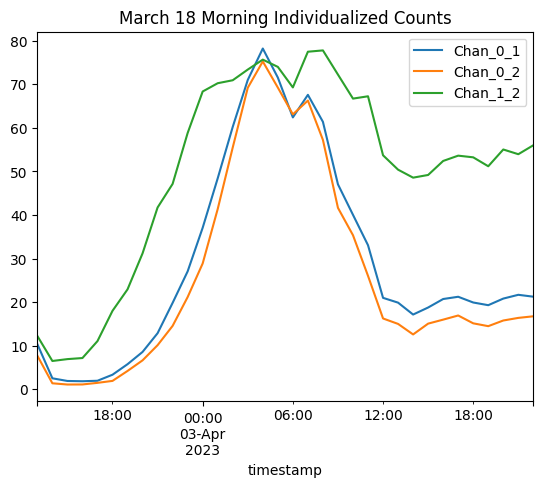

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-04-02 13:00:00,10.352941,7.705882,12.235294,10.098039
2023-04-02 14:00:00,2.512195,1.365854,6.487805,3.455285
2023-04-02 15:00:00,1.900000,1.083333,6.916667,3.300000
2023-04-02 16:00:00,1.836066,1.098361,7.163934,3.366120
2023-04-02 17:00:00,1.950000,1.466667,11.050000,4.822222


Text(0.5, 1.0, 'Stone Mountain Office April 2 to April 3')

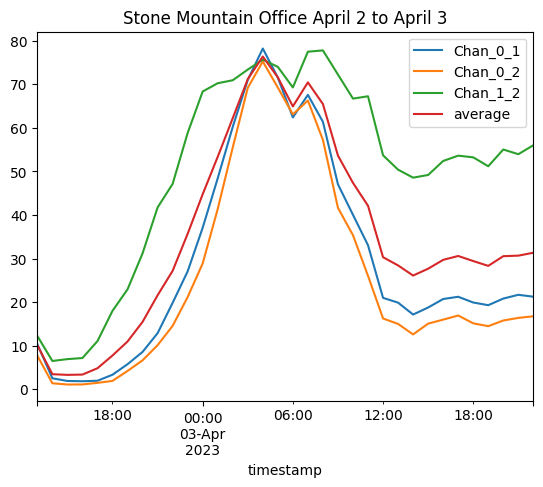

In [13]:
df_morn_counts.plot()
plt.title('Stone Mountain Office April 2 to April 3')
#plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

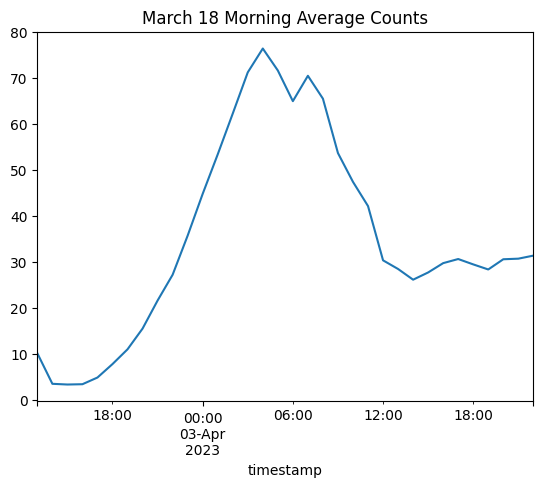

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')